In [23]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [70]:
#Dataset 불러오기
df = pd.read_csv('happydata.csv')

In [25]:
#Data 확인
print(df.head())
print(df.shape)
print(df.info())

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
4          5          4              3            3              3       5   

   happy  
0      0  
1      0  
2      1  
3      0  
4      0  
(143, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy      

In [26]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [27]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [71]:
df.duplicated().sum()

18

In [72]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


<AxesSubplot:xlabel='happy'>

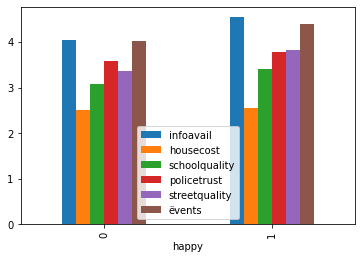

In [30]:
df.groupby('happy').mean().plot(kind='bar')

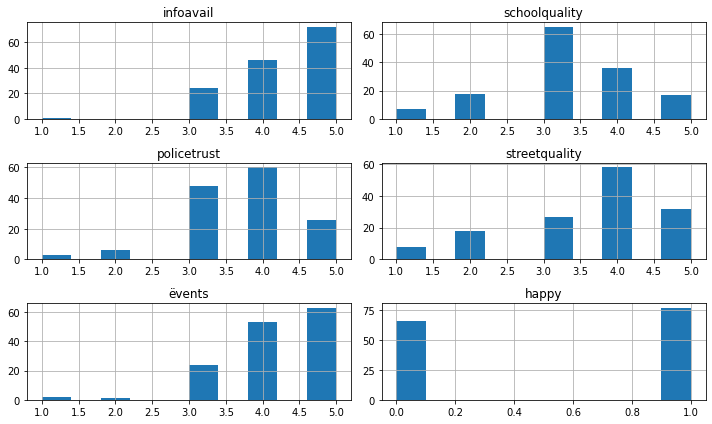

In [53]:
# Create histograms for each variable
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

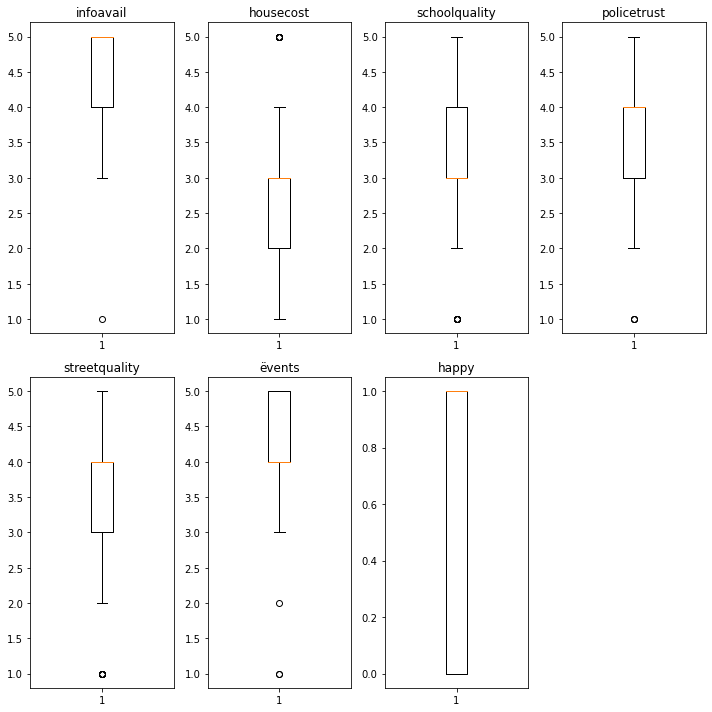

In [31]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [33]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [73]:
x = df.iloc[:,:6]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.2,
                                                    random_state=0)

x_train.shape, x_test.shape

((114, 6), (29, 6))

In [75]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)
print(guesses)

[1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0]


In [76]:
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[8 6]
 [8 7]]
0.5172413793103449


[0.5862068965517241, 0.5172413793103449, 0.4827586206896552, 0.5172413793103449, 0.41379310344827586, 0.5172413793103449, 0.3793103448275862, 0.3793103448275862, 0.41379310344827586, 0.41379310344827586, 0.41379310344827586, 0.3793103448275862, 0.4482758620689655, 0.5172413793103449, 0.4827586206896552, 0.5862068965517241, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.6206896551724138, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241, 0.6551724137931034, 0.6206896551724138, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5862068965517241, 0.5172413793103449, 0.5862068965517241, 0.5517241379310345, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.5172413793103449, 0.5862068965517241, 0.5517241379310345, 0.5862068965517241, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241]


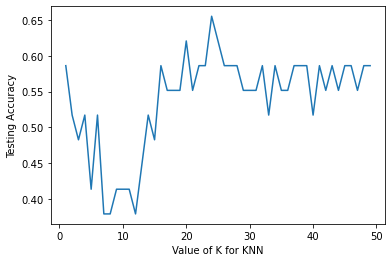

In [77]:
#정확도 올리기
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### 0.6551724137931034로 증가

<AxesSubplot:>

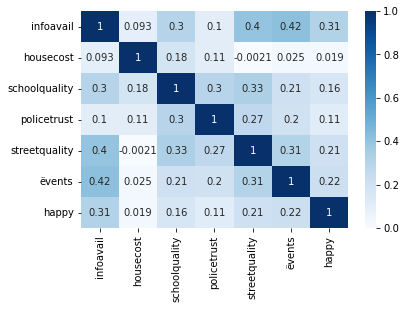

In [78]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [79]:
df = df.drop(['housecost'], axis=1)

In [80]:
x = df.iloc[:,:5]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.2,
                                                    random_state=0)

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)
print(guesses)

[1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0]


[0.5517241379310345, 0.6896551724137931, 0.5862068965517241, 0.5517241379310345, 0.4482758620689655, 0.5172413793103449, 0.6206896551724138, 0.6206896551724138, 0.5517241379310345, 0.5862068965517241, 0.5172413793103449, 0.5517241379310345, 0.5172413793103449, 0.5172413793103449, 0.5172413793103449, 0.4827586206896552, 0.5172413793103449, 0.4827586206896552, 0.5172413793103449, 0.4827586206896552, 0.5517241379310345, 0.5172413793103449, 0.5862068965517241, 0.5517241379310345, 0.5517241379310345, 0.5517241379310345, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.6206896551724138, 0.5517241379310345, 0.5517241379310345, 0.5172413793103449, 0.5517241379310345, 0.5517241379310345, 0.6206896551724138, 0.5172413793103449, 0.5862068965517241, 0.6206896551724138, 0.5862068965517241, 0.6206896551724138, 0.5862068965517241, 0.5172413793103449, 0.4827586206896552, 0.5517241379310345, 0.5172413793103449, 0.5172413793103449, 0.4827586206896552, 0.5517241379310345]


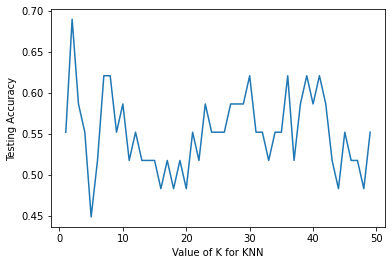

In [81]:
#정확도 올리기
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### 0.6896551724137931로 증가

In [82]:
x = df.iloc[:,:5]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.3,
                                                    random_state=0)

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)
print(guesses)

[0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 1 0 0 1 1 1]


[0.6511627906976745, 0.6046511627906976, 0.6511627906976745, 0.6744186046511628, 0.6046511627906976, 0.627906976744186, 0.627906976744186, 0.627906976744186, 0.5813953488372093, 0.5813953488372093, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976, 0.5581395348837209, 0.6046511627906976, 0.5348837209302325, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976, 0.6046511627906976, 0.6046511627906976, 0.6046511627906976, 0.5813953488372093, 0.627906976744186, 0.6046511627906976, 0.6511627906976745, 0.6511627906976745, 0.6511627906976745, 0.6511627906976745, 0.627906976744186, 0.6046511627906976, 0.6511627906976745, 0.6046511627906976, 0.6511627906976745, 0.627906976744186, 0.627906976744186, 0.6744186046511628, 0.6976744186046512, 0.627906976744186, 0.6511627906976745, 0.6046511627906976, 0.6046511627906976, 0.627906976744186, 0.6046511627906976, 0.5813953488372093, 0.5581395348837209, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976]


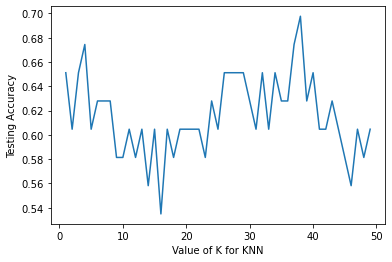

In [83]:
#정확도 올리기
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### 0.6976744186046512로 증가

In [85]:
# 6. Check Accuracy Score
print("Model : KNN")
print(confusion_matrix(y_test, guesses))
print("Accuracy : 0.6976744186046512")

Model : KNN
[[ 3 16]
 [ 1 23]]
Accuracy : 0.6976744186046512


In [56]:
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset.
df = df.copy()

#Rescaling features age, thalach, oldpeak.
scaler = MinMaxScaler()

features = [['infoavail','schoolquality','policetrust','streetquality','ëvents']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])


[0.4418604651162791, 0.5348837209302325, 0.46511627906976744, 0.6046511627906976, 0.4186046511627907, 0.4186046511627907, 0.46511627906976744, 0.5116279069767442, 0.46511627906976744, 0.5581395348837209, 0.5116279069767442, 0.5116279069767442, 0.5348837209302325, 0.5116279069767442, 0.4418604651162791, 0.46511627906976744, 0.4883720930232558, 0.5813953488372093, 0.46511627906976744, 0.5581395348837209, 0.5348837209302325, 0.5348837209302325, 0.5348837209302325, 0.46511627906976744, 0.4883720930232558, 0.46511627906976744, 0.46511627906976744, 0.46511627906976744, 0.4883720930232558, 0.4883720930232558, 0.4883720930232558, 0.4883720930232558, 0.4883720930232558, 0.46511627906976744, 0.4186046511627907, 0.46511627906976744, 0.4418604651162791, 0.46511627906976744, 0.46511627906976744, 0.46511627906976744, 0.4883720930232558, 0.46511627906976744, 0.4883720930232558, 0.4883720930232558, 0.5116279069767442, 0.5116279069767442, 0.5116279069767442, 0.5116279069767442, 0.5116279069767442]


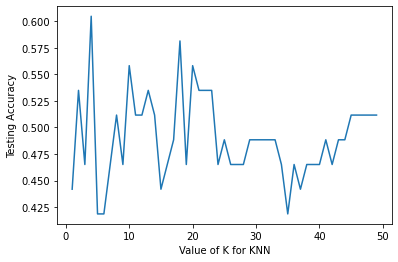

In [57]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()